<a href="https://colab.research.google.com/github/lumap-svg/ML/blob/main/Fashion_minst_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [6]:
import matplotlib.pyplot as plt


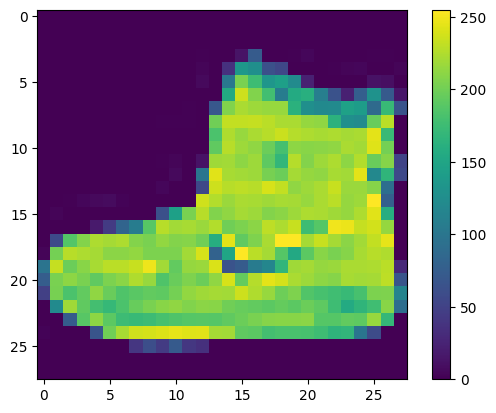

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

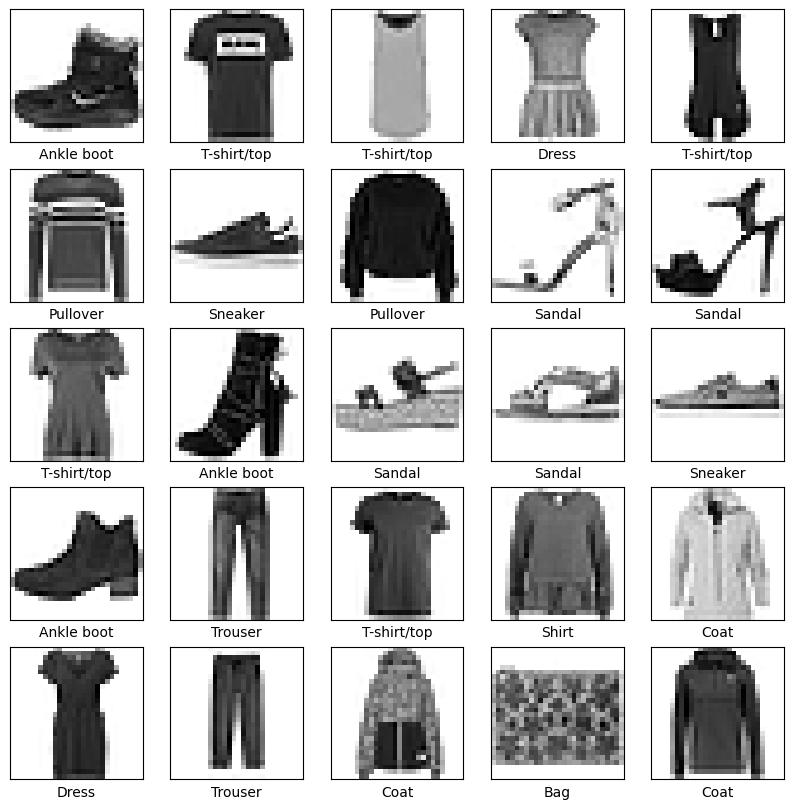

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize =(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(classes[train_labels[i]])


In [34]:
model =keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(10, activation='Softmax')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5379 - accuracy: 0.8091
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3815 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3432 - accuracy: 0.8741
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3198 - accuracy: 0.8825
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2999 - accuracy: 0.8890
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2858 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2737 - accuracy: 0.8980
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2625 - accuracy: 0.9016
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2532 - accuracy: 0.9054
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.244

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3304 - accuracy: 0.8848


In [30]:
prediction = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [31]:
prediction[0]

array([9.0045353e-11, 2.5337287e-12, 4.5713607e-11, 4.8061634e-16,
       2.5751807e-12, 3.6691397e-04, 2.5625202e-08, 1.3280473e-02,
       5.0498267e-10, 9.8635256e-01], dtype=float32)

In [32]:
np.argmax(prediction[0])

9

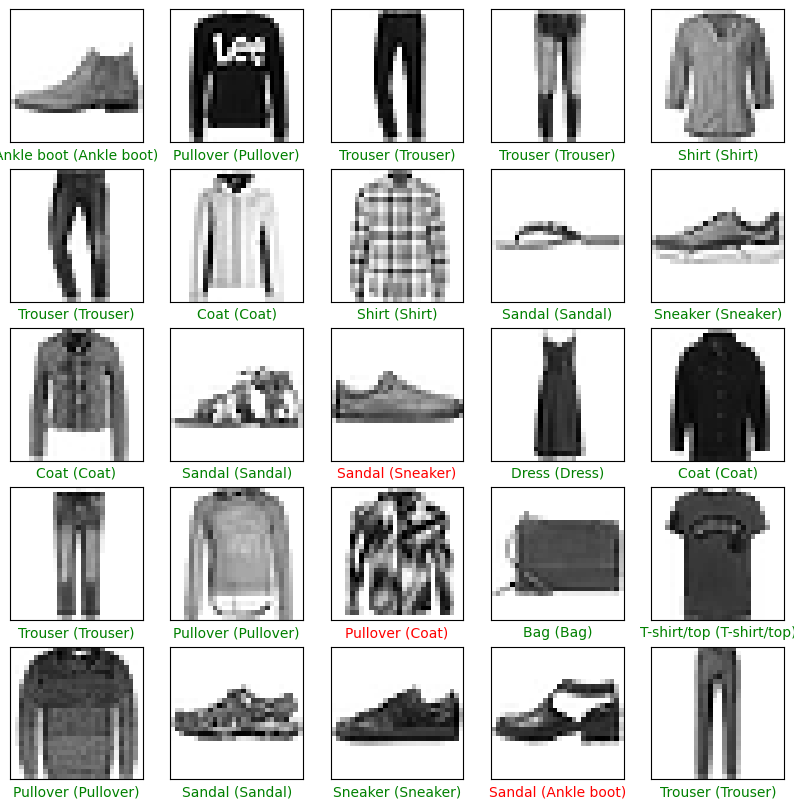

In [33]:
plt.figure(figsize =(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  plt.xlabel(classes[train_labels[i]])
  predicted_label = np.argmax(prediction[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else :
    color = 'red'
  plt.xlabel("{} ({})".format(classes[predicted_label],classes[true_label]), color=color)



In [17]:
img = test_images[0]
print(img.shape)

(28, 28)


In [18]:
img =(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [19]:
predictions = model.predict(img)

1/1 [==============================] - 0s 39ms/step


Text(0.5, 0, 'Trouser (Trouser)')

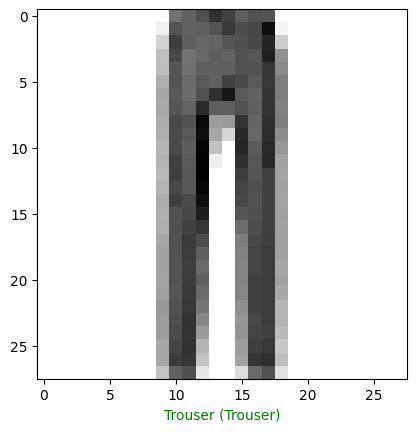

In [20]:
plt.figure()
plt.imshow(test_images[i], cmap = plt.cm.binary)

plt.xlabel(classes[train_labels[i]])
predicted_label = np.argmax(prediction[i])
true_label = test_labels[i]
if predicted_label == true_label:
  color = 'green'
else :
  color = 'red'
plt.xlabel("{} ({})".format(classes[predicted_label],classes[true_label]), color=color)

